In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('Iris Flower Dataset.csv')
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [22]:
# Step 2: Check and remove null values
print(df.isnull().sum())
df = df.dropna()
print("Null values after removal:", df.isnull().sum().sum())


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Null values after removal: 0


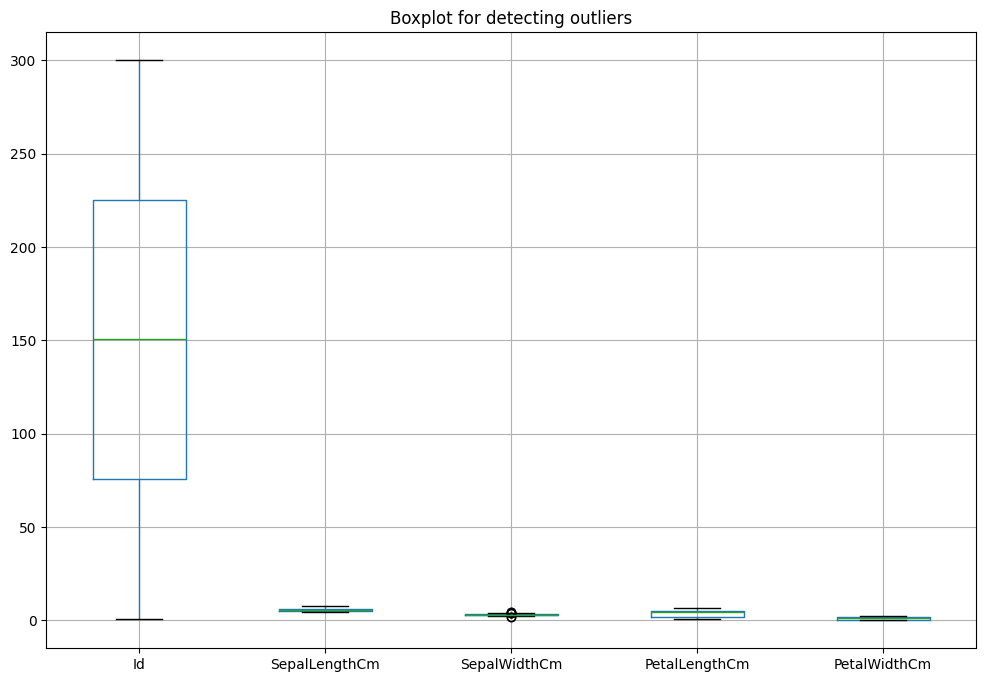

In [24]:
# Step 3: Outlier detection using Boxplot
plt.figure(figsize=(12,8))
df.drop('Species', axis=1).boxplot()
plt.title('Boxplot for detecting outliers')
plt.show()


In [25]:
# Step 4: Remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

columns = df.columns[:-1]  # exclude species
df = remove_outliers_iqr(df, columns)
print("Shape after outlier removal:", df.shape)


Shape after outlier removal: (292, 6)


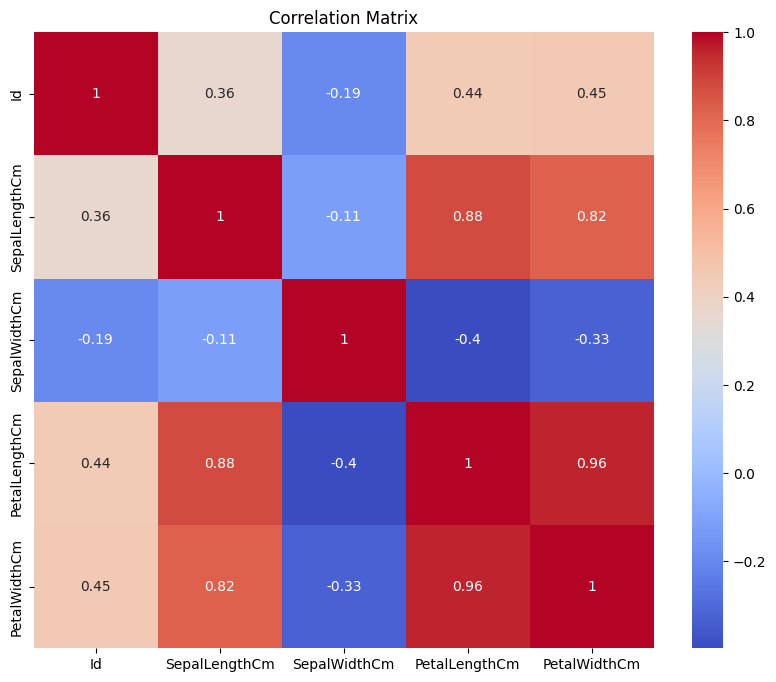

In [28]:
# Step 5: Correlation Matrix
plt.figure(figsize=(10,8))
# Drop the 'Species' column to avoid string to float conversion error
numeric_df = df.drop('Species', axis=1)
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [39]:
# Step 6: Preprocessing for Model Training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df.drop('Species', axis=1)
y = df['Species']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Random Forest Accuracy: 1.0000


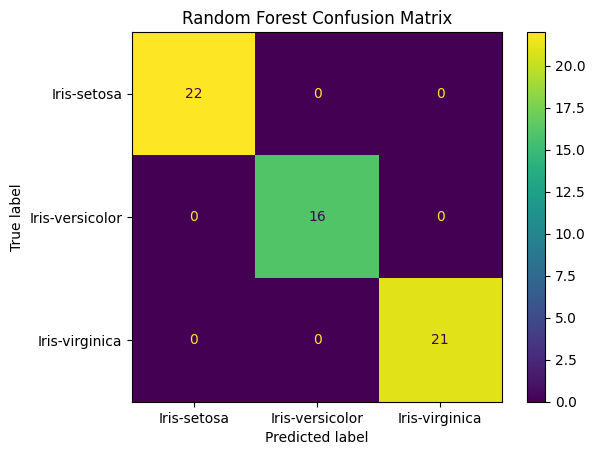

In [44]:
# Step 7.1: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_acc:.4f}")

cm_rf = confusion_matrix(y_test, rf_preds)
ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=le.classes_).plot()
plt.title('Random Forest Confusion Matrix')
plt.show()


KNN Accuracy: 0.9831


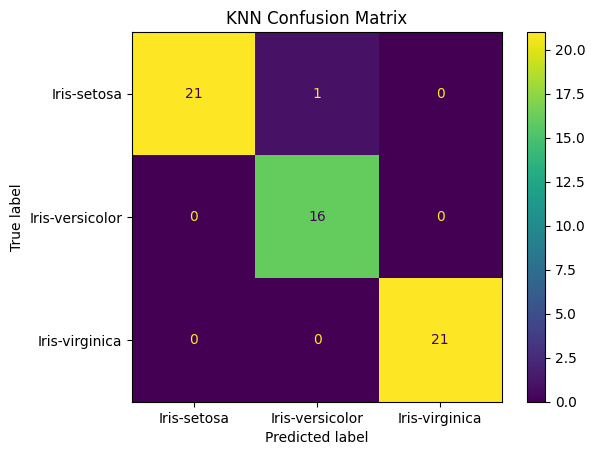

In [45]:
# Step 7.2: K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_preds)
print(f"KNN Accuracy: {knn_acc:.4f}")

cm_knn = confusion_matrix(y_test, knn_preds)
ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=le.classes_).plot()
plt.title('KNN Confusion Matrix')
plt.show()


Decision Tree Accuracy: 0.9661


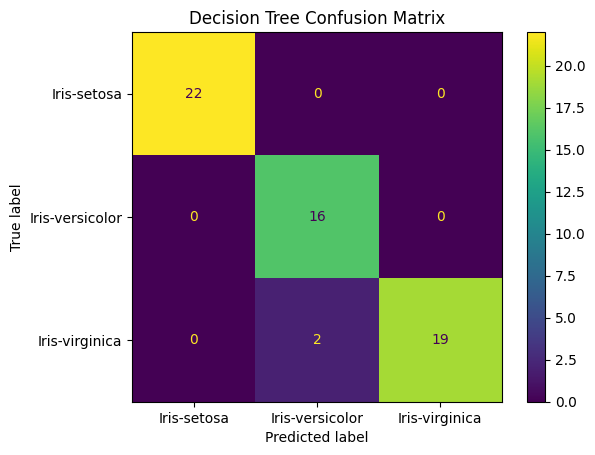

In [46]:
# Step 7.3: Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)
print(f"Decision Tree Accuracy: {dt_acc:.4f}")

cm_dt = confusion_matrix(y_test, dt_preds)
ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=le.classes_).plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()


Logistic Regression Accuracy: 0.9831


c:\Users\User\Desktop\New folder (2)\AlRafiAhmed-Iris-Flower-Classification-Using-Machine-Learnin\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


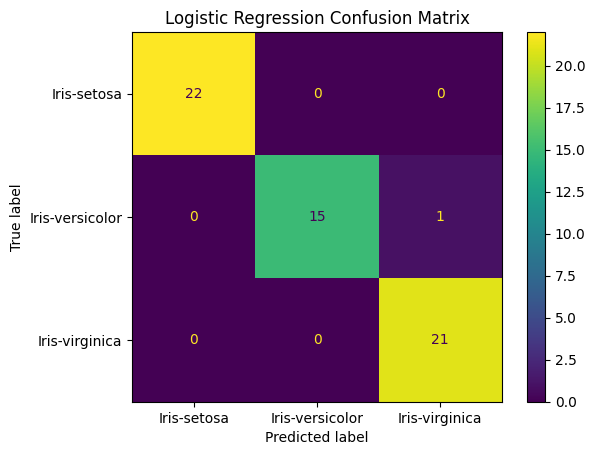

In [51]:
# Step 7.4: Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_preds)
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")

cm_lr = confusion_matrix(y_test, lr_preds)
ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=le.classes_).plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()


Bagging Classifier Accuracy: 0.9661


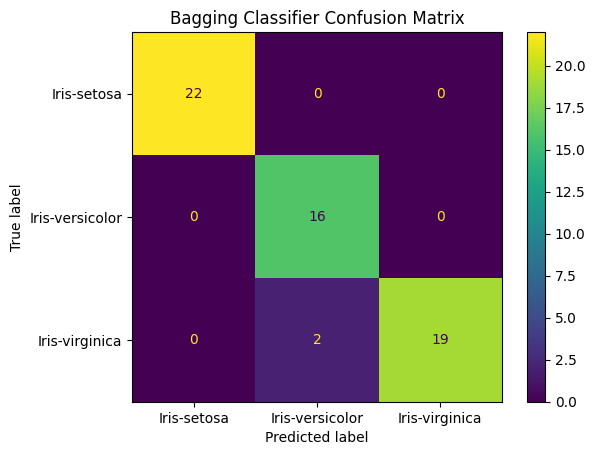

In [55]:
# BaggingClassifier with DecisionTree
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
bagging_preds = bagging.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_preds)

print(f"Bagging Classifier Accuracy: {bagging_acc:.4f}")

# Confusion Matrix
cm_bagging = confusion_matrix(y_test, bagging_preds)
ConfusionMatrixDisplay(confusion_matrix=cm_bagging, display_labels=le.classes_).plot()
plt.title('Bagging Classifier Confusion Matrix')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_14504\3848035569.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=[value * 100 for value in accuracies.values()], palette='viridis')


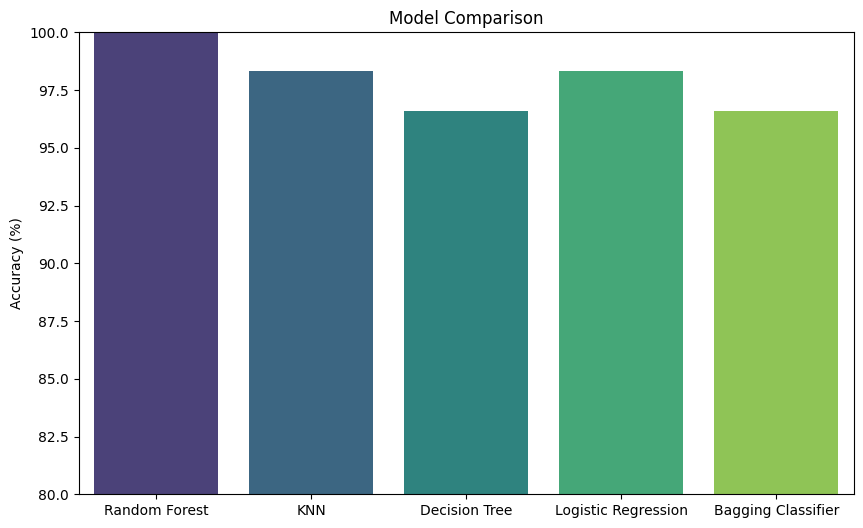

In [56]:
# Step 8: Accuracy Bar Chart for Comparison
accuracies = {
    'Random Forest': rf_acc,
    'KNN': knn_acc,
    'Decision Tree': dt_acc,
    'Logistic Regression': lr_acc,
    'Bagging Classifier': bagging_acc
}

plt.figure(figsize=(10,6))
sns.barplot(x=list(accuracies.keys()), y=[value * 100 for value in accuracies.values()], palette='viridis')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison')
plt.ylim(80, 100)
plt.show()


In [53]:
# Step 9: Save the Best Model
import joblib

best_model_name = max(accuracies, key=accuracies.get)
print(f"Best Model: {best_model_name}")

# Save the corresponding model
if best_model_name == 'Random Forest':
    joblib.dump(rf, 'best_iris_model.pkl')
elif best_model_name == 'KNN':
    joblib.dump(knn, 'best_iris_model.pkl')
elif best_model_name == 'Decision Tree':
    joblib.dump(dt, 'best_iris_model.pkl')
elif best_model_name == 'Logistic Regression':
    joblib.dump(lr, 'best_iris_model.pkl')

print("Best model saved as 'best_iris_model.pkl'")


Best Model: Random Forest
Best model saved as 'best_iris_model.pkl'
